# [Введение в визуализацию данных с Seaborn. 3. Матричные графики.](https://nagornyy.me/courses/data-science/intro-to-seaborn/)

## Импорт

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Набор данных

Используется встроенный [набор данных о чаевых](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv)

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Используется встроенный [набор данных о полётах](https://github.com/mwaskom/seaborn-data/blob/master/flights.csv)

In [3]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Преобразование данных

In [4]:
flights_pivot = flights.pivot_table(
    values='passengers', index='month', columns='year')
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


# Матричные графики

## heatmap

In [5]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


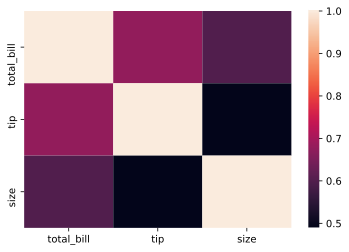

In [6]:
sns.heatmap(tips.corr())

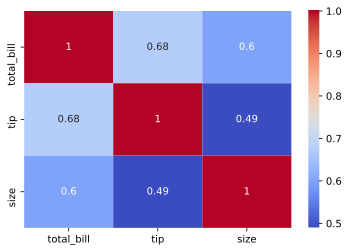

In [7]:
sns.heatmap(tips.corr(), cmap='coolwarm', annot=True)

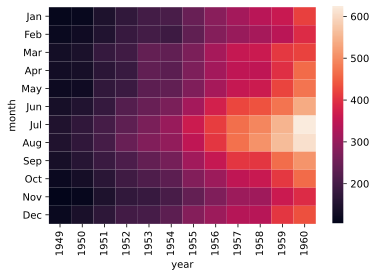

In [8]:
sns.heatmap(flights_pivot)

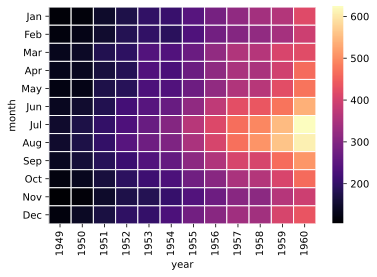

In [9]:
sns.heatmap(flights_pivot, cmap='magma', linecolor='white', linewidths=1)

## clustermap

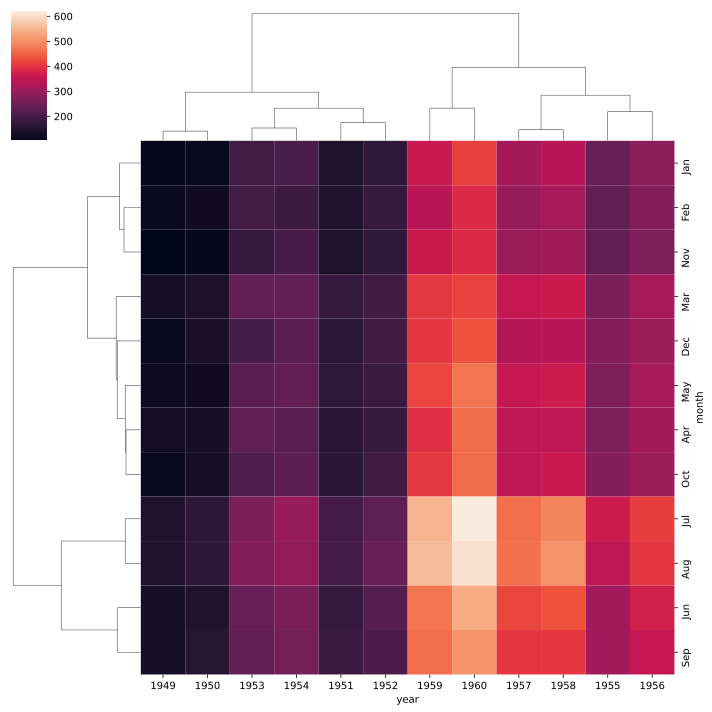

In [10]:
sns.clustermap(flights_pivot)

# Стили графиков

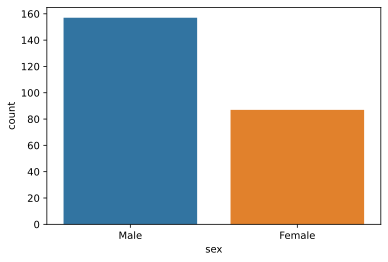

In [11]:
sns.countplot(x='sex', data=tips)

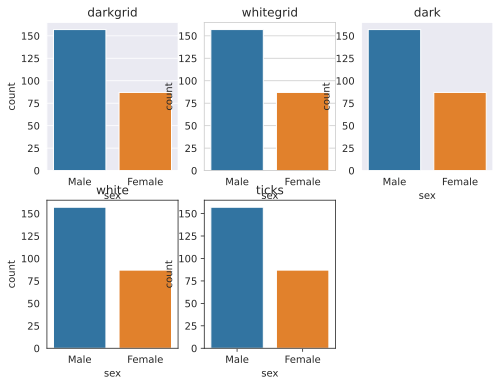

In [12]:
styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

plt.figure(figsize=(8, 6))
num_x = 2
num_y = 3

for i in range(num_x):
    for j in range(num_y):
        if i*num_y+j < len(styles):
            sns.set_style(styles[i*num_y+j])
            plt.subplot(num_x, num_y, i*num_y+j+1)
            plt.title(styles[i*num_y+j])
            sns.countplot(x='sex', data=tips)
        else:
            break

Все переметры стиля можно посмотреть следующим образом:

In [13]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': '.15',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': '.15',
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': '.15',
 'xtick.bottom': True,
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False}

Если необходимо применить стиль только к одному графику, для этого следует использовать менеджер контекста with

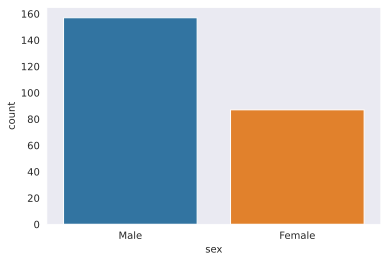

In [14]:
with sns.axes_style('dark'):
    sns.countplot(x='sex', data=tips)

Можно удалить линии осей при помощи метода despine

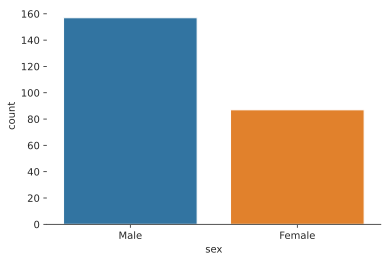

In [15]:
sns.countplot(x='sex', data=tips)
sns.despine(left=True)

Размеры задаются так же, как и в обычном matplotlib.

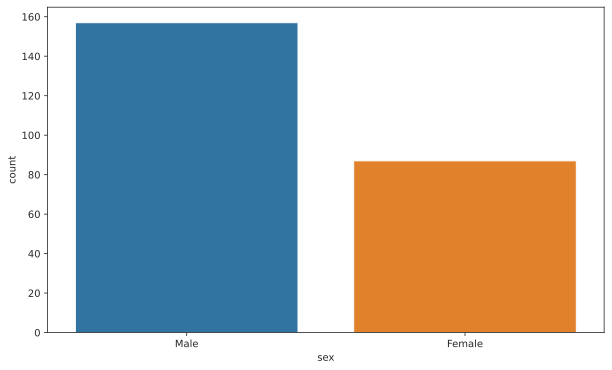

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=tips)

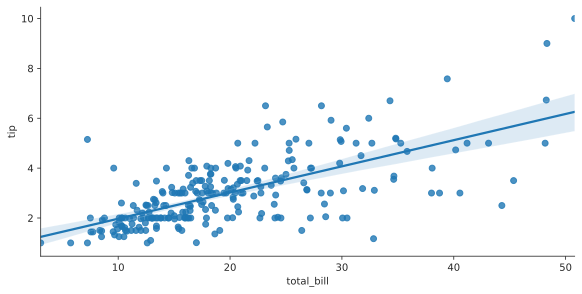

In [17]:
sns.lmplot(x='total_bill', y='tip', height=4, aspect=2, data=tips)

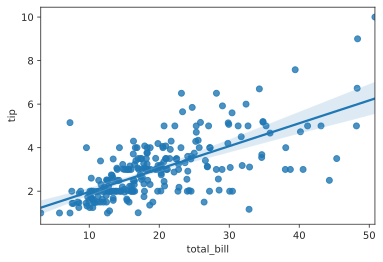

In [18]:
sns.regplot(x='total_bill', y='tip', data=tips)

# Использование Seaborn совместно с matplotlib

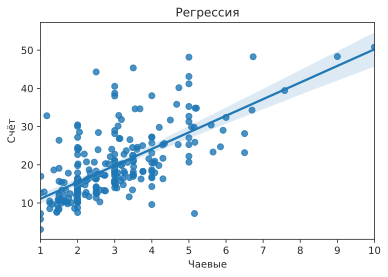

In [19]:
fig, ax = plt.subplots()
sns.regplot(x='tip', y='total_bill', data=tips, ax=ax)
ax.set_title('Регрессия')
plt.xlabel('Чаевые')
plt.ylabel('Счёт')
fig.savefig('filename.png', dpi=200)